In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
from torch import (roll, zeros)
from google.colab import files


# Task 2.5 - PyTorch Implementation


In [ ]:
def jacobi_torch(f):
    newf = f.clone()
    oldf = f.clone()

    # Circular shift to the right
    right_shifted = roll(oldf, shifts=(0, 1), dims=(0, 1))

    # Circular shift to the left
    left_shifted = roll(oldf, shifts=(0, -1), dims=(0, 1))

    # Circular shift upwards
    up_shifted = roll(oldf, shifts=(-1, 0), dims=(0, 1))

    # Circular shift downwards
    down_shifted = roll(oldf, shifts=(1, 0), dims=(0, 1))

    # Update newf using roll operations
    newf[1:-1, 1:-1] = 0.25 * (right_shifted[1:-1, 1:-1] + left_shifted[1:-1, 1:-1] +
                              up_shifted[1:-1, 1:-1] + down_shifted[1:-1, 1:-1])

    return newf

#Task 2.6 - CuPy Implementation

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
pip install cupy-cuda12x

In [ ]:
import cupy as cp

def cupy_jacobi(f):
    newf = f.copy()
    # Circular shift to the right
    right_shifted = cp.roll(f, 1, axis=1)

    # Circular shift to the left
    left_shifted = cp.roll(f, -1, axis=1)

    # Circular shift upwards
    up_shifted = cp.roll(f, -1, axis=0)

    # Circular shift downwards
    down_shifted = cp.roll(f, 1, axis=0)

    # Update newf using roll operations
    newf[1:-1, 1:-1] = 0.25 * (right_shifted[1:-1, 1:-1] + left_shifted[1:-1, 1:-1] +
                              up_shifted[1:-1, 1:-1] + down_shifted[1:-1, 1:-1])
    cp.cuda.Stream.null.synchronize()

    return newf

#Task 2.7 - Comparison of the different methods

In [ ]:
def jacobi(f):
    newf = f.copy()
    for i in range(1, newf.shape[0]-1):
        for j in range(1, newf.shape[1]-1):
            newf[i, j] = 0.25 * (f[i, j+1] + f[i, j-1] + f[i+1, j] + f[i-1, j])
    return newf

In [ ]:
exec_time = [[] for _ in range(3)]  # Initialize with 3 empty lists

for _ in range(3):
    exec_time[_] = [[] for _ in range(62)]  # Create sub-lists for each implementation

for i, grid in enumerate(range (3, 65), start=0):
  randVal = np.random.rand(grid, grid)

  initPy = torch.from_numpy(randVal).float().cuda()
  initCu = cp.asarray(randVal)
  initGrid = randVal

  t1 = time.time()
  for j in range(1000):
    initPy = jacobi_torch(initPy)
  t2 = time.time()
  exec_time[0][i].append(t2 - t1)

  t3 = time.time()
  for j in range(1000):
    initCu = cupy_jacobi(initCu)
  t4 = time.time()
  exec_time[1][i].append(t4 - t3)

  t5 = time.time()
  for j in range(1000):
    initGrid = jacobi(initGrid)
  t6 = time.time()
  exec_time[2][i].append(t6 - t5)


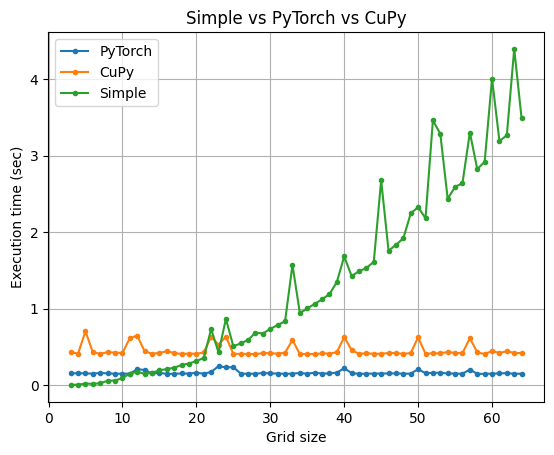

In [ ]:
import matplotlib.pyplot as plt

grid_sizes = [g for g in range(3, 65)]

plt.plot(grid_sizes, exec_time[0], marker='.', linestyle='-', label='PyTorch')
plt.plot(grid_sizes, exec_time[1], marker='.', linestyle='-', label='CuPy')
plt.plot(grid_sizes, exec_time[2], marker='.', linestyle='-', label='Simple')

plt.xlabel('Grid size')
plt.ylabel('Execution time (sec)')
plt.title('Simple vs PyTorch vs CuPy')
plt.grid(True)
plt.legend()
plt.savefig('task7.png')

plt.show()

#Task 2.8 - Save the matrix using h5py

In [ ]:
import h5py

newgrid_simple = initGrid

hdf5_file_path = 'simple_newgrid.h5'

with h5py.File(hdf5_file_path, 'w') as hdf5_file:
    hdf5_file.create_dataset('newgrid_simple', data=newgrid_simple)

print(f'Array saved to {hdf5_file_path}')

Array saved to simple_newgrid.h5
